## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 43)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]
#X_test = X_test.drop(columns = 'alc')

In [7]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Hyperparameter Tuning on KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [12]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [13]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [14]:
best_grid_knn = grid_search_knn.best_estimator_

In [15]:
X_test.columns

Index(['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other',
       'famsup_no', 'famsup_yes', 'Medu', 'Fedu'],
      dtype='object')

In [16]:
best_grid_knn

KNeighborsClassifier(n_neighbors=10, weights='distance')

## Applying best estimators in KNN Classifier

[[91 36]
 [20 62]]
Accuracy Score 0.7320574162679426
Classification report:               precision    recall  f1-score   support

         0.0       0.82      0.72      0.76       127
         1.0       0.63      0.76      0.69        82

    accuracy                           0.73       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.73      0.73       209



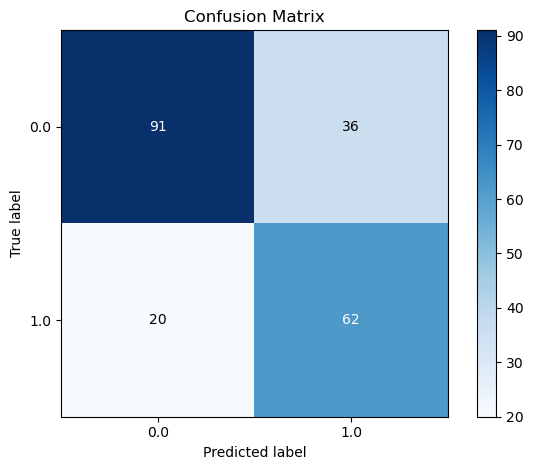

In [17]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [18]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train).round (3)))


Classification Report for Train Set
Accuracy Score 0.9047085201793722
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       446
         1.0       0.92      0.88      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



In [19]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
204,0.0,1.0
205,0.0,1.0
206,0.0,0.0
207,0.0,1.0


## Hyperparameter Tuning on Decision Tree

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [21]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
}

In [22]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [23]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=30)

## Appying best estimators on Decision Tree

[[88 39]
 [17 65]]
Accuracy Score 0.7320574162679426
Classification report: 
              precision    recall  f1-score   support

         0.0       0.84      0.69      0.76       127
         1.0       0.62      0.79      0.70        82

    accuracy                           0.73       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.73      0.74       209



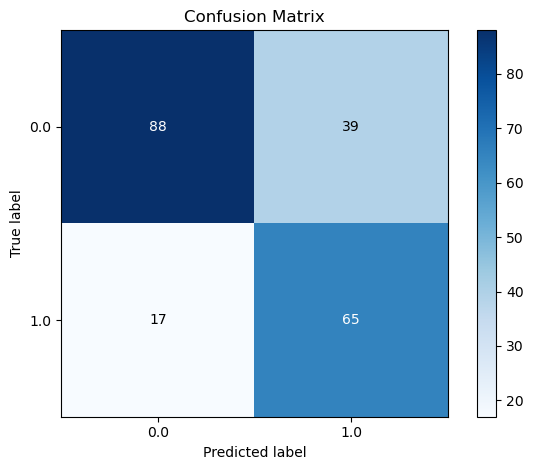

In [24]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

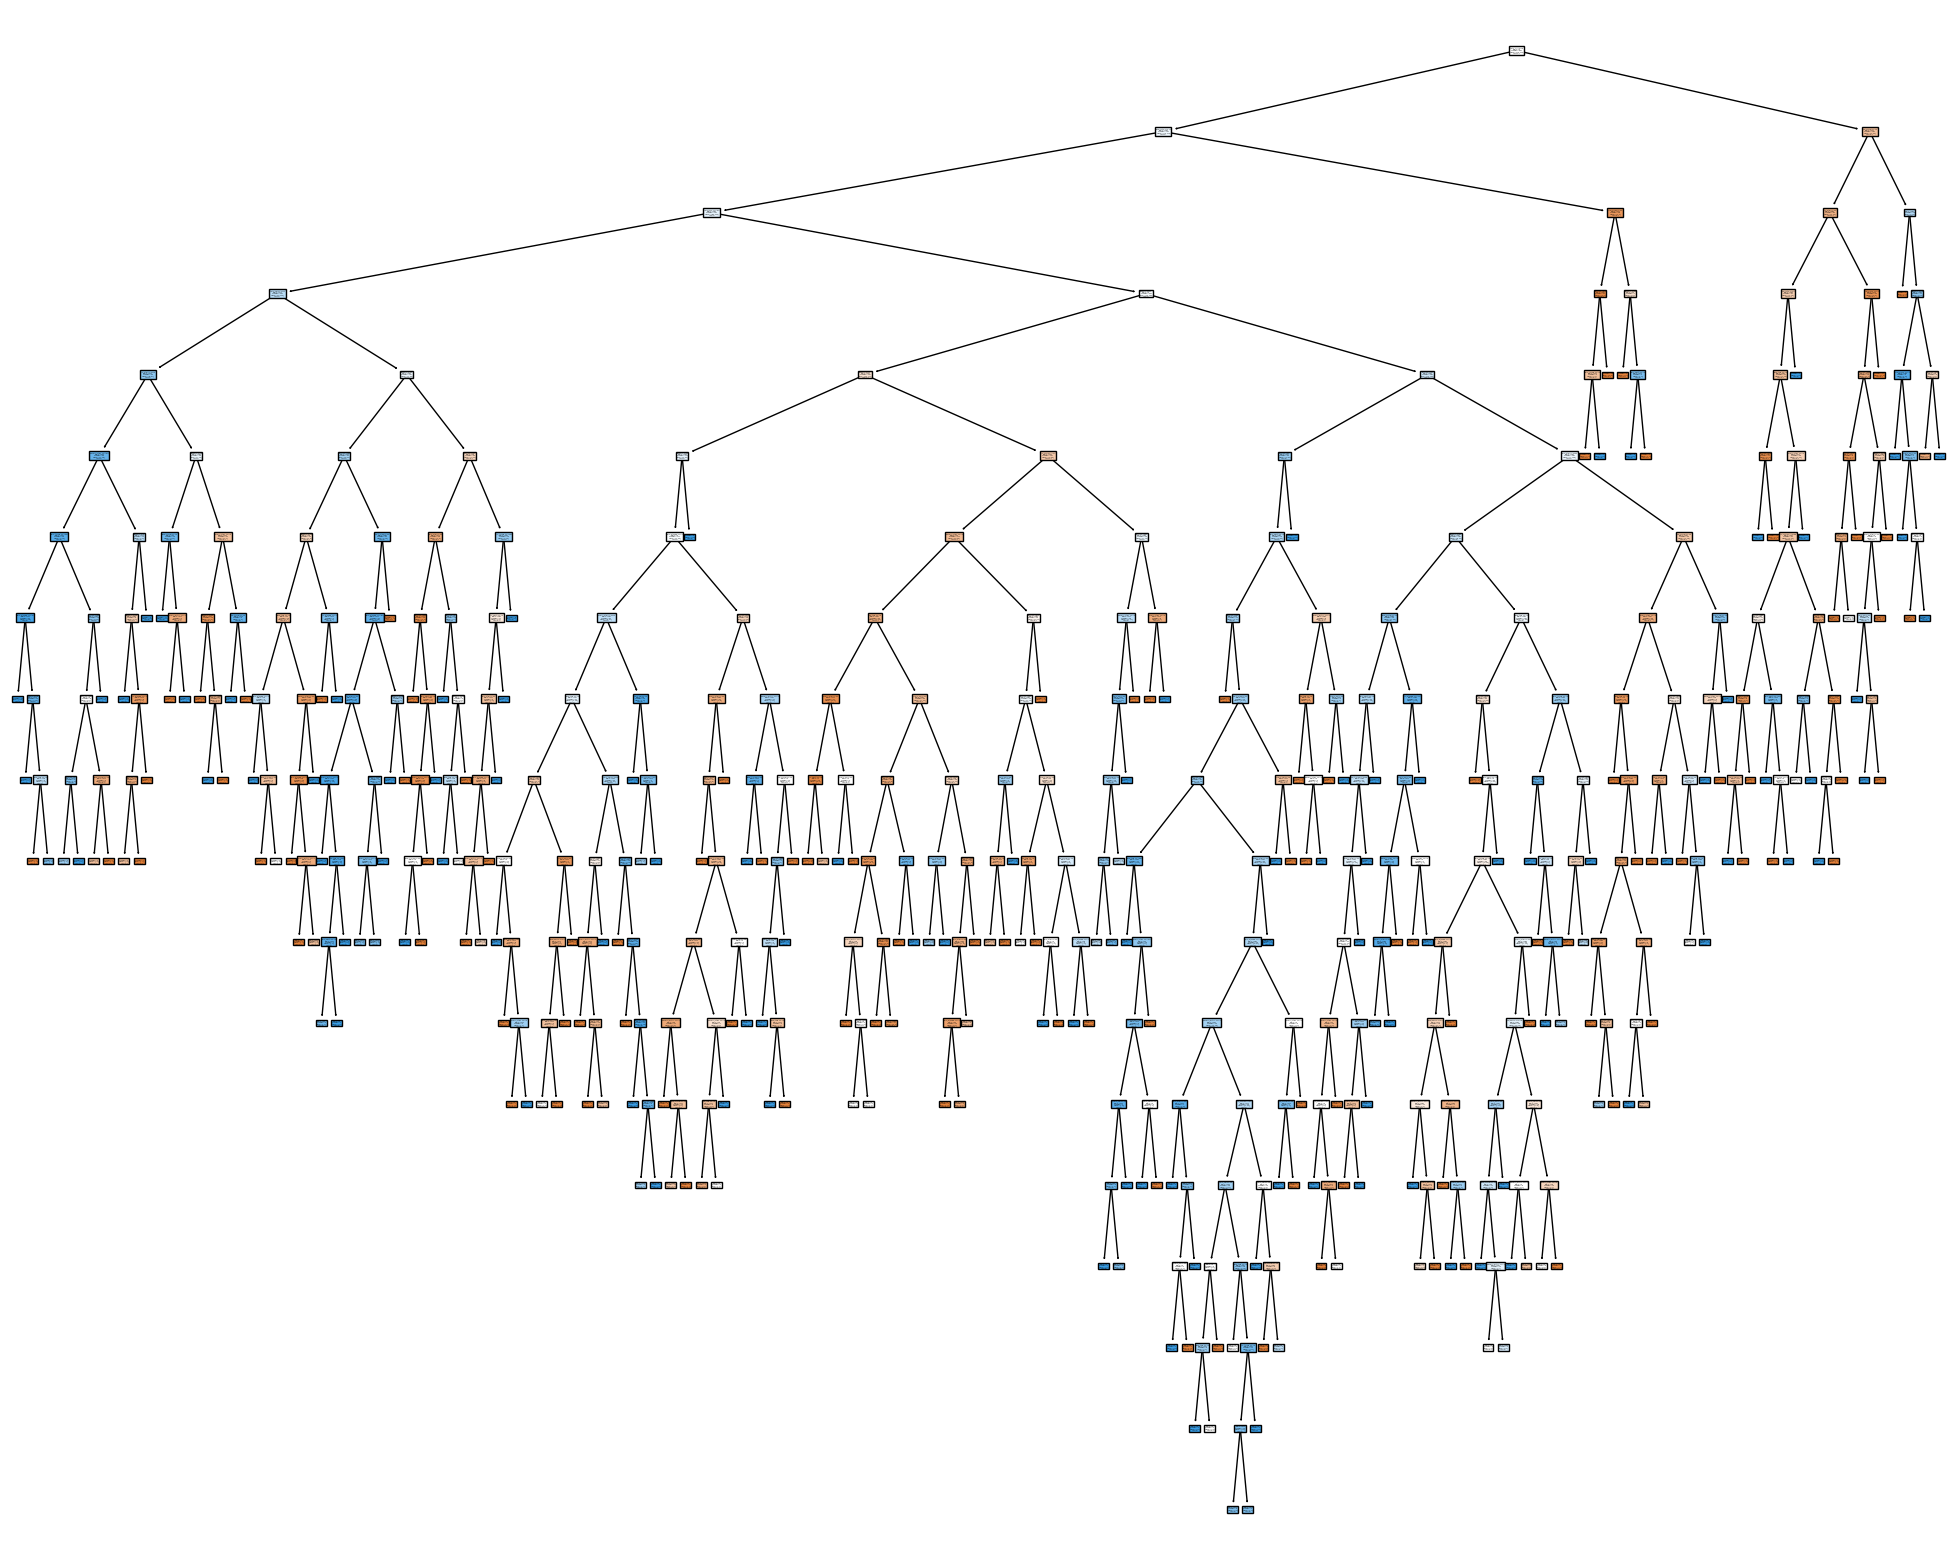

In [25]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [26]:
fig.savefig("decistion_tree.png")

Max Depth =  1 , Train Acc. =  0.538 , Test Acc. =  0.383
Max Depth =  2 , Train Acc. =  0.565 , Test Acc. =  0.397
Max Depth =  3 , Train Acc. =  0.567 , Test Acc. =  0.397
Max Depth =  4 , Train Acc. =  0.612 , Test Acc. =  0.56
Max Depth =  5 , Train Acc. =  0.637 , Test Acc. =  0.545
Max Depth =  6 , Train Acc. =  0.679 , Test Acc. =  0.512
Max Depth =  7 , Train Acc. =  0.722 , Test Acc. =  0.569
Max Depth =  8 , Train Acc. =  0.769 , Test Acc. =  0.603
Max Depth =  9 , Train Acc. =  0.797 , Test Acc. =  0.636
Max Depth =  10 , Train Acc. =  0.835 , Test Acc. =  0.699
Max Depth =  11 , Train Acc. =  0.857 , Test Acc. =  0.708
Max Depth =  12 , Train Acc. =  0.872 , Test Acc. =  0.699
Max Depth =  13 , Train Acc. =  0.885 , Test Acc. =  0.722
Max Depth =  14 , Train Acc. =  0.895 , Test Acc. =  0.727
Max Depth =  15 , Train Acc. =  0.9 , Test Acc. =  0.727
Max Depth =  16 , Train Acc. =  0.905 , Test Acc. =  0.718
Max Depth =  17 , Train Acc. =  0.905 , Test Acc. =  0.722
Max Depth

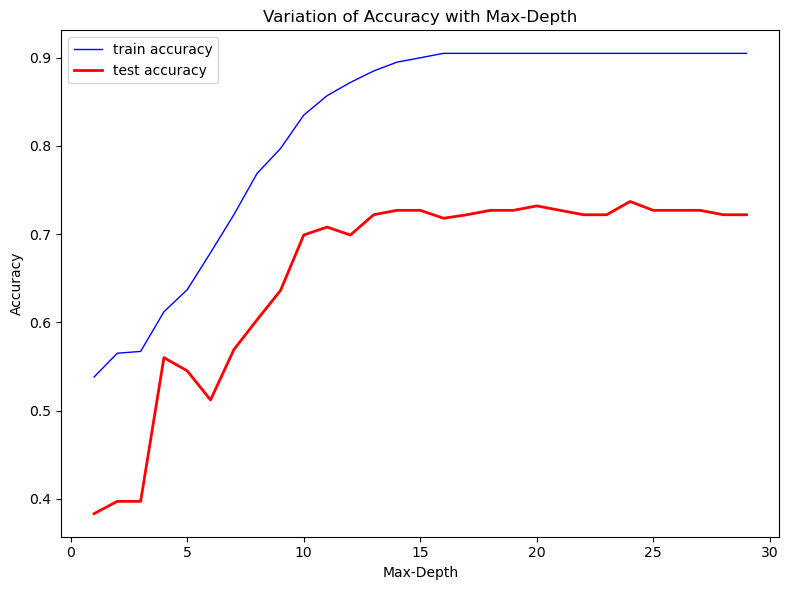

In [27]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [28]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


,0,1
0,413,33
1,52,394


In [29]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,88,39
1,17,65


In [30]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       446
         1.0       0.92      0.88      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



In [31]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.84      0.69      0.76       127
         1.0       0.62      0.79      0.70        82

    accuracy                           0.73       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.73      0.74       209



## Hyperparameter Tuning on Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [33]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [34]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [35]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=100, max_features=None,
                       n_estimators=10)

## Applying best estimators in Random Forest

In [36]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features=None,
                       n_estimators=10)

In [37]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[83 44]
 [27 55]]
Accuracy Score 0.6602870813397129
Classification report: 
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70       127
         1.0       0.56      0.67      0.61        82

    accuracy                           0.66       209
   macro avg       0.66      0.66      0.65       209
weighted avg       0.68      0.66      0.66       209



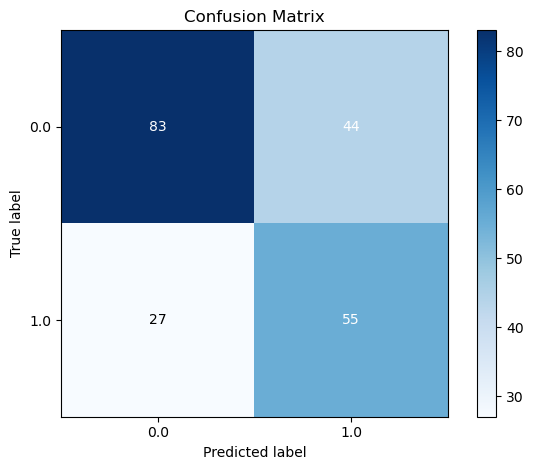

In [38]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

## Hyperparameter Tuning on Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [41]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5,

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.0549e-17): result may not be accurate.
  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are remo

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [42]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(solver='liblinear')

[[78 49]
 [31 51]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       127
         1.0       0.51      0.62      0.56        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.63      0.62      0.62       209



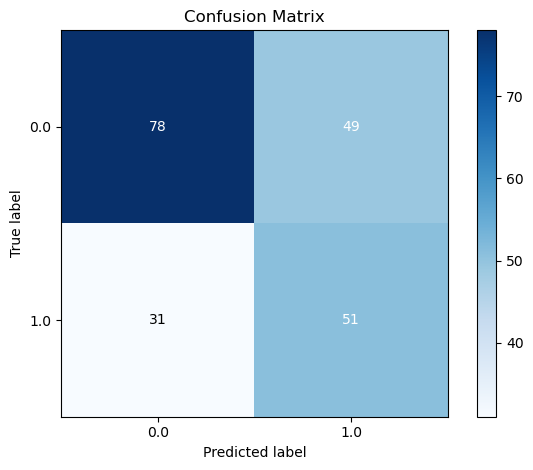

In [43]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [44]:
from sklearn.svm import SVC

In [45]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [46]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=5, splitter=best; total time=   0.0s
[CV] END ......criterion=ent

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=500; total time=   1.5s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=50; total time=   0.2s
[CV

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterio

[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=500; total time=   1.7s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=500; total time=   1.6s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END crit

[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   2.1s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END crite

[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterio

[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   2.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   1.8s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   1.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   1.4s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END cri

[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   2.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criter

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=s

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=aut

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=sca

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=po

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, pr

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=T

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=lin

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, 

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probabili

[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, 

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.56851436 0.56851436
 0.56851436 0.56851436 0.56851436 0.56851436 0.56851436 0.56851436
 0.60766542 0.60766542 0.60766542 

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [47]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

[[71 56]
 [33 49]]
Accuracy Score 0.5741626794258373
Classification report: 
              precision    recall  f1-score   support

         0.0       0.68      0.56      0.61       127
         1.0       0.47      0.60      0.52        82

    accuracy                           0.57       209
   macro avg       0.57      0.58      0.57       209
weighted avg       0.60      0.57      0.58       209



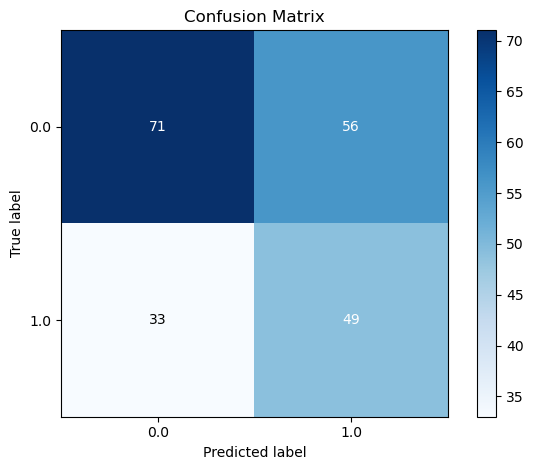

In [48]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [49]:
from  sklearn.naive_bayes import MultinomialNB

In [50]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [51]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [52]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(fit_prior=False)

[[78 49]
 [39 43]]
Accuracy Score 0.5789473684210527
Classification report: 
              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64       127
         1.0       0.47      0.52      0.49        82

    accuracy                           0.58       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.59      0.58      0.58       209



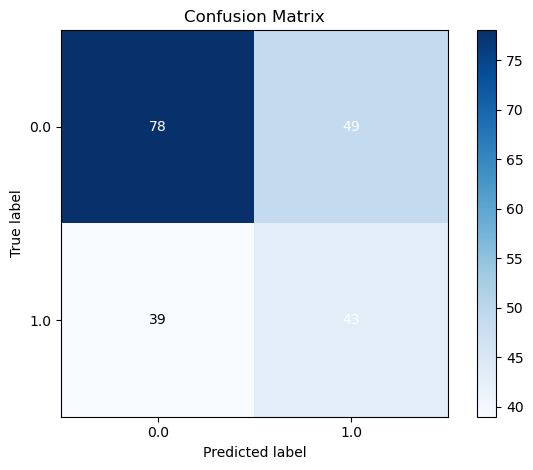

In [53]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [54]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [56]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=10,
                                                   weights='distance')),
                             ('dt', DecisionTreeClassifier(max_depth=30)),
                             ('lr', LogisticRegression(solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=100,
                                                     max_features=None,
                                                     n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(fit_prior=False))])

In [57]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7320574162679426
DecisionTreeClassifier 0.7272727272727273
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.6889952153110048
SVC 0.5741626794258373
MultinomialNB 0.5789473684210527
VotingClassifier 0.69377990430622


Accuracy Score 0.69377990430622
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       127
         1.0       0.62      0.59      0.60        82

    accuracy                           0.69       209
   macro avg       0.68      0.67      0.68       209
weighted avg       0.69      0.69      0.69       209



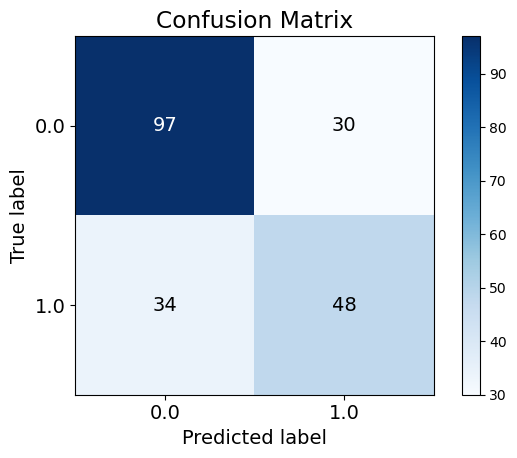

In [58]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [59]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=10,
                                                   weights='distance')),
                             ('dt', DecisionTreeClassifier(max_depth=30)),
                             ('lr', LogisticRegression(solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=100,
                                                     max_features=None,
                                                     n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(fit_prior=False))],
                 voting='soft')

In [60]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7320574162679426
DecisionTreeClassifier 0.722488038277512
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.69377990430622
SVC 0.5741626794258373
MultinomialNB 0.5789473684210527
VotingClassifier 0.7368421052631579


Accuracy Score 0.7368421052631579
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76       127
         1.0       0.63      0.80      0.71        82

    accuracy                           0.74       209
   macro avg       0.74      0.75      0.73       209
weighted avg       0.76      0.74      0.74       209



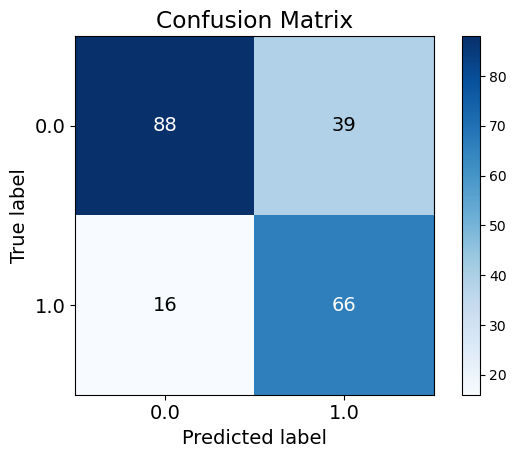

In [61]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [63]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.7600896860986547
Test Accuracy 0.7416267942583732


Accuracy Score 0.7416267942583732
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       127
         1.0       0.64      0.78      0.70        82

    accuracy                           0.74       209
   macro avg       0.74      0.75      0.74       209
weighted avg       0.76      0.74      0.74       209



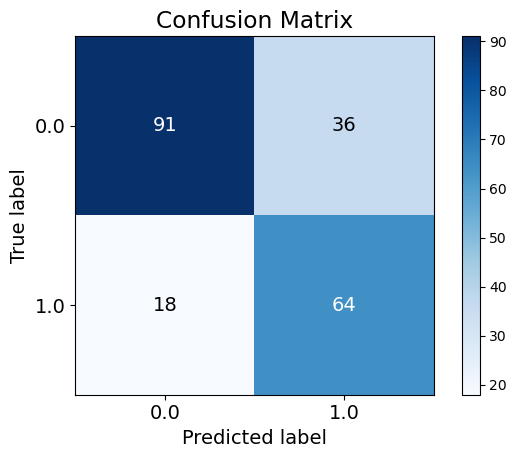

In [64]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

## impact of no. of estimators

In [65]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.702914798206278  test acc =  0.5885167464114832 oob =  0.594170403587444
Num of estimators:  100  train acc =  0.7298206278026906  test acc =  0.583732057416268 oob =  0.6053811659192825
Num of estimators:  150  train acc =  0.7197309417040358  test acc =  0.583732057416268 oob =  0.5952914798206278
Num of estimators:  200  train acc =  0.7275784753363229  test acc =  0.6076555023923444 oob =  0.6087443946188341
Num of estimators:  250  train acc =  0.7174887892376681  test acc =  0.6028708133971292 oob =  0.6121076233183856
Num of estimators:  300  train acc =  0.7197309417040358  test acc =  0.6124401913875598 oob =  0.6053811659192825
Num of estimators:  350  train acc =  0.7208520179372198  test acc =  0.6076555023923444 oob =  0.6109865470852018
Num of estimators:  400  train acc =  0.718609865470852  test acc =  0.6124401913875598 oob =  0.6053811659192825
Num of estimators:  450  train acc =  0.7197309417040358  test acc =  0.60765550239234

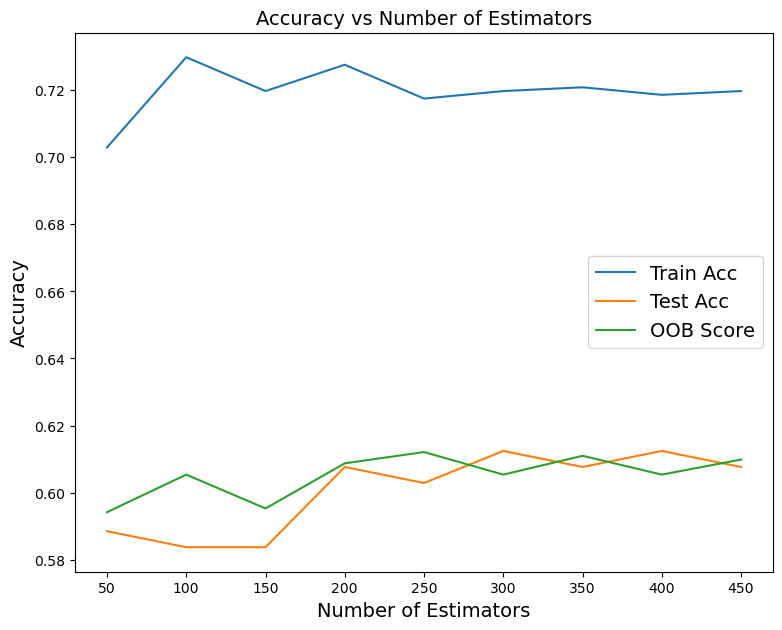

In [66]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6220095693779905

Accuracy Score 0.6220095693779905
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       127
         1.0       0.52      0.61      0.56        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.64      0.62      0.63       209



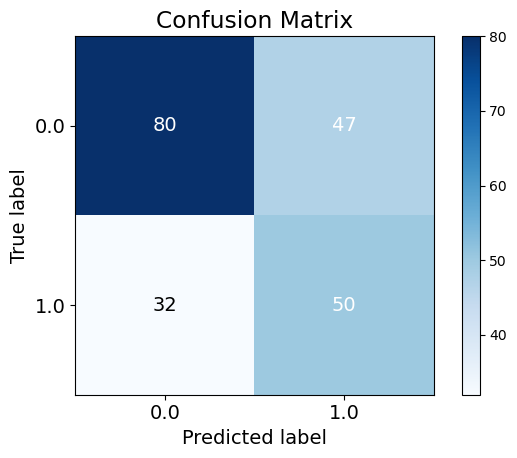

In [68]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [69]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

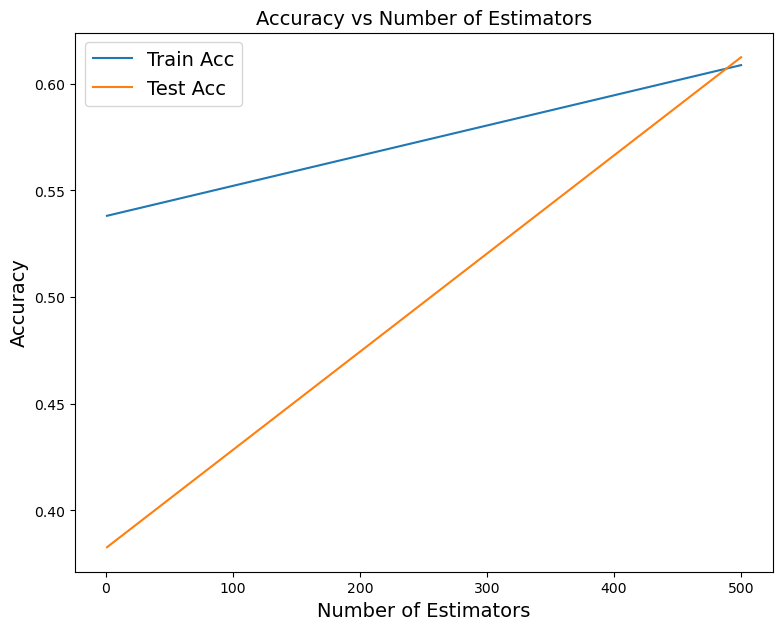

In [70]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [71]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [ ]:
conda install -c conda-forge ds-lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [ ]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [ ]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [ ]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, bag_clf.predict_proba, num_features=len(feature_names))


In [ ]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", bag_clf.predict_proba([instance]))



In [ ]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

### Feature Importance Plot

In [ ]:
feature_importance = explanation_lime.as_list()


In [ ]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [ ]:
feature_contributions = explanation_lime.local_exp[1]

In [ ]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [ ]:
import matplotlib.pyplot as plt
    print('Predicted: ',bag_clf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

### Explanation for class 0

In [ ]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], bag_clf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',bag_clf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


In [ ]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_dt.predict(X_test)}).head(10)

[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kern

[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kern

[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, ga

[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scal